# **Multinomial Naive Bayes |  Klasifikasi Sentimen Ulasan Game Call of Duty**

Sebuah model untuk menganalisis sentimen ulasan game Call of Duty.

## 1. Data Preparation

### 1.1 Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Read Data

In [3]:
df = pd.read_csv('Call Of Duty.csv')

In [4]:

# 5 baris teratas dataset
df.head()

,reviews,ratings
0,I've been playing for years now and it's been ...,4
1,An annoying experience all round. Ever since t...,1
2,"I love the game though. It's close to real, bu...",3
3,I've been playing for years now and it's been ...,4
4,An annoying experience all round. Ever since t...,1


In [5]:

df.sample(10)

,reviews,ratings
2087,It's overall the best mobile game ever but the...,5
1597,What the f*** is with this game my game was go...,3
2551,You need to change microphones back to the way...,2
3734,Its a good game. Please add replay feature so ...,4
2829,"Hey developers team, I have an issue with this...",1
3220,"It's fun, and addictive, amazing game ! Don't ...",3
642,Excellent game but the graphics and updates an...,3
3370,In all honesty if the update takes more of my ...,3
747,Game is good... But I think you've the need to...,3
1028,Nothing loads into the screen like my guns amo...,1


In [6]:
# 5 baris terbawah dataset
df.tail()

,reviews,ratings
3877,It is the best game ever i have ever had but t...,4
3878,It is good. But I am not able to increase grap...,4
3879,There's nothing lime a few rounds of cod to he...,4
3880,Absolutely trash. You can't even play ranked w...,1
3881,Why all this unnecessary downloads. I mean jus...,1


In [7]:
# Ringkasan informasi 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3882 non-null   object
 1   ratings  3882 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.8+ KB


In [9]:
# Jumlah baris dan kolom
print('Jumlah baris = ', df.shape[0])
print('Jumlah kolom = ', df.shape[1])


Jumlah baris =  3882
Jumlah kolom =  2


In [18]:
# Cek tipe data
df.dtypes

reviews    object
ratings     int64
dtype: object

In [ ]:
# Cek nilai unik rating
df['ratings'].unique()

array([4, 1, 3, 2, 5])

In [21]:
df['ratings'].value_counts()

ratings
5    1191
1     953
4     737
3     570
2     428
Name: count, dtype: int64

### 1.3 Cek Missing Value dan Data Duplikat

#### 1.3.1 Cek Missing Value 

In [10]:
# Cek missing value
df.isnull().sum()

reviews    0
ratings    0
dtype: int64

#### 1.3.2 Cek Data Duplikat

In [12]:
# Cek data 
print('Jumlah data duplikat = ', df.duplicated().sum())

Jumlah data duplikat =  3


In [13]:
# Menampilkan data dari duplikat
df[df.duplicated()]

,reviews,ratings
3,I've been playing for years now and it's been ...,4
4,An annoying experience all round. Ever since t...,1
96,Best fps experience you can get on mobile. The...,5


#### 1.3.3 Menangani Data Duplikat

In [14]:
# Hapus data duplikat
df.drop_duplicates(keep='first', inplace=True)

In [15]:
print('Jumlah data duplikat = ', df.duplicated().sum())

Jumlah data duplikat =  0


## 2. EDA

### 2.1 Distribusi Data

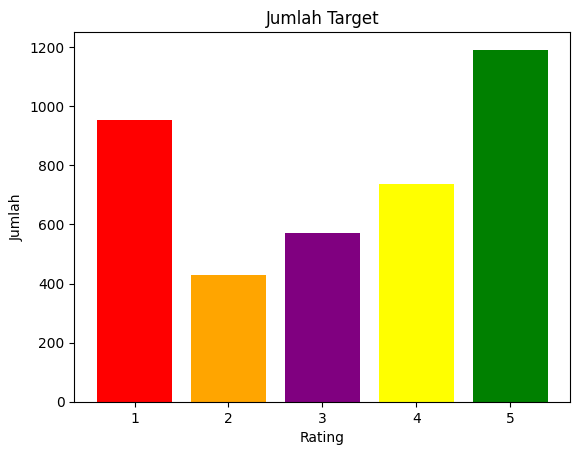

In [30]:
counts = df['ratings'].value_counts().sort_index()

plt.bar(counts.index, counts.values, color=['red','orange','purple', 'yellow', 'green'])
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.title('Jumlah Target')
plt.show()

Dari graifk diatas, kita dapat melihat bahwa pengguna yang memberikan rating '5' atau sangat puas adalah antara 1000 - 1200 pengguna. Sedangkan yang memberi rating '1' atau sangat tidak puas, antara 800 - 1000 pengguna.

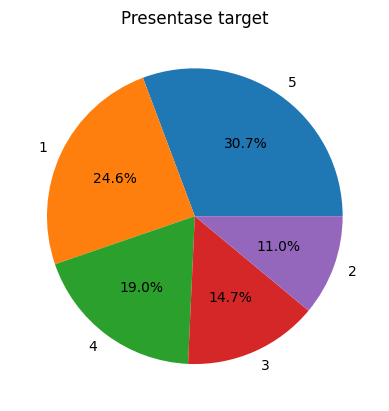

In [37]:
plt.pie(df['ratings'].value_counts(), labels=df['ratings'].value_counts().index, autopct='%1.1f%%')
plt.title('Presentase target')
plt.show()

Presentase yang sangat puas adalah 30.7% pengguna

# 3. Modeling

## 3.1 Pisah variabel Independent dan Dependent

In [38]:
X = df.drop('ratings', axis=1).values # Independent
y = df['ratings'].values # Dependent

In [40]:
def clean_text(text):
    text = text.lower()

    # daftar karakter yang akan dihapus
    remove_chars = ".,!?;:-_()[]{}\"'@#$%^&*/\\|+=<>~`"

    for ch in remove_chars:
        text = text.replace(ch, " ")

    # hapus angka
    for num in "0123456789":
        text = text.replace(num, " ")

    # rapikan spasi ganda
    text = " ".join(text.split())

    return text


In [42]:
df.head()

,reviews,ratings
0,I've been playing for years now and it's been ...,4
1,An annoying experience all round. Ever since t...,1
2,"I love the game though. It's close to real, bu...",3
5,COD happens to be my best mobile game but with...,2
6,Codm is awesome and I can guarantee is the bes...,5


AttributeError: 'int' object has no attribute 'split'